In [4]:
#data loading and cleaning

import pandas as pd

df = pd.read_csv('/kaggle/input/onlineretail/OnlineRetail.csv', encoding='ISO-8859-1')
df.dropna(subset=['InvoiceNo', 'StockCode', 'Description'], inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['InvoiceNo'].str.startswith('C') == False]
df['Description'] = df['Description'].str.strip().str.lower()

In [7]:
#create transaction dataset

basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
         .set_index('InvoiceNo'))
basket = basket.applymap(lambda x: x > 0)


/tmp/ipykernel_35/2097328898.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: x > 0)


In [17]:
#run apriori and association rules

from mlxtend.frequent_patterns import apriori, association_rules

freq_itemsets = apriori(basket, min_support=0.02, use_colnames=True)
rules = association_rules(freq_itemsets, metric="lift", min_threshold=1.2)
rules = rules.sort_values(['confidence', 'lift'], ascending=False)

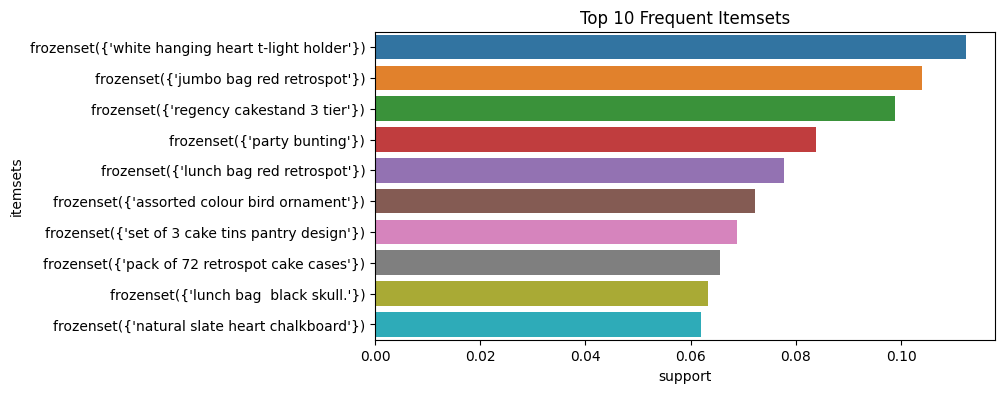

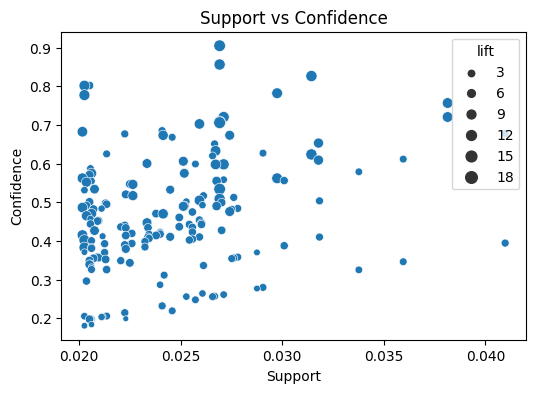

In [18]:
#visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Frequent Itemset Support
plt.figure(figsize=(8,4))
sns.barplot(x='support', y='itemsets',
            data=freq_itemsets.nlargest(10, 'support'))
plt.title('Top 10 Frequent Itemsets')
plt.savefig('images/support_count_plot.png')

# Rules Scatter Plot
plt.figure(figsize=(6,4))
sns.scatterplot(x='support', y='confidence',
                size='lift', data=rules)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.savefig('images/rules_scatter.png')

